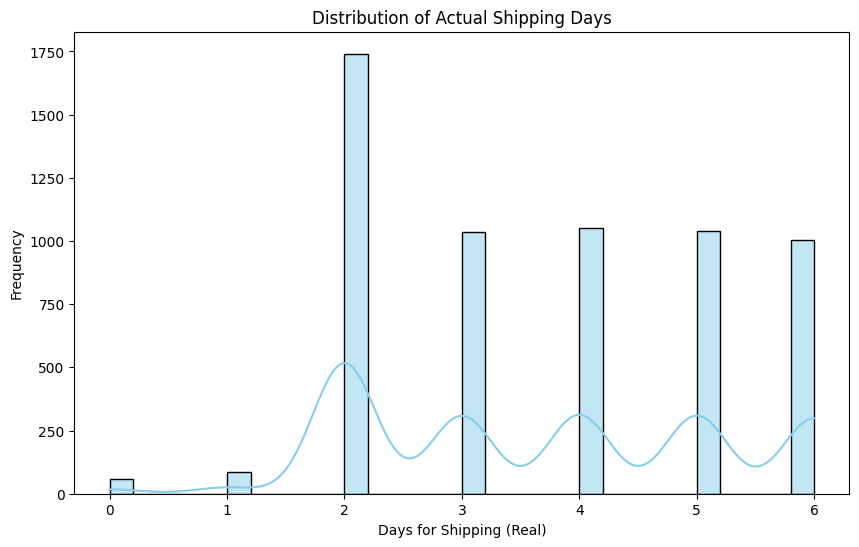

<ipython-input-7-a4ba987968fb>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Order Region', order=df['Order Region'].value_counts().index, palette='viridis')


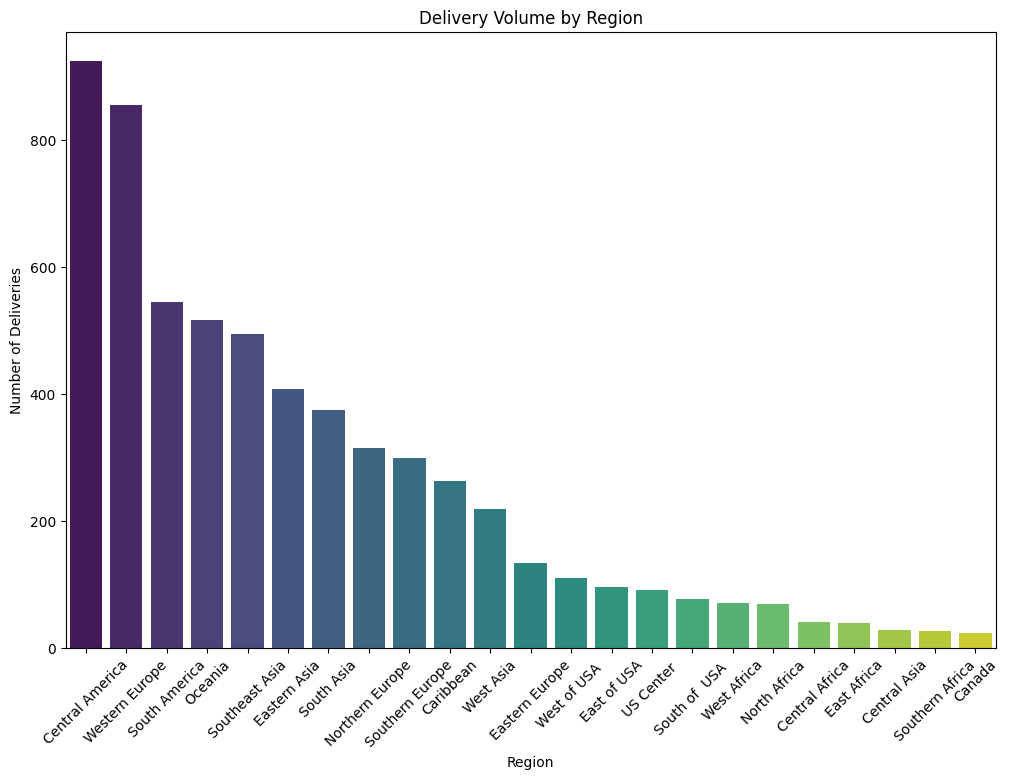

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

# Load your dataset
df = pd.read_csv('/content/CompanySupplyChainDataset.csv', encoding='latin1')

# 1. Geospatial Map of Delivery Routes (using Latitude and Longitude for the end location)
map_routes = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=6)

# Plot points for delivery locations on the map
for _, row in df.iterrows():
    folium.CircleMarker(
        location=(row['Latitude'], row['Longitude']),
        radius=5,
        color="blue",
        fill=True,
        fill_color="blue",
        fill_opacity=0.6
    ).add_to(map_routes)

# Save the map as an HTML file
map_routes.save("delivery_routes_map.html")

# 2. Route Density Map (Heatmap)
map_density = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=6)
heat_data = [[row['Latitude'], row['Longitude']] for index, row in df.iterrows() if not pd.isnull(row['Latitude']) and not pd.isnull(row['Longitude'])]
HeatMap(heat_data).add_to(map_density)

# Save the density map as an HTML file
map_density.save("delivery_density_map.html")

# 3. Delivery Time Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Days for shipping (real)'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Actual Shipping Days")
plt.xlabel("Days for Shipping (Real)")
plt.ylabel("Frequency")
plt.show()

# 4. Delivery Volume by Region
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Order Region', order=df['Order Region'].value_counts().index, palette='viridis')
plt.title("Delivery Volume by Region")
plt.xlabel("Region")
plt.ylabel("Number of Deliveries")
plt.xticks(rotation=45)
plt.show()


Dataset Preview:
   order_id  product_id  order_date courier_delivery        city  \
0    738527         194  2022-12-12              JNE   Palembang   
1    149822         268  2023-04-13          SiCepat  Yogyakarta   
2    635991         175  2023-01-01              JNE    Surabaya   
3    221362         257  2023-05-15    POS Indonesia      Bekasi   
4    687298         269  2022-07-30              JNE     Bandung   

           district type_of_delivery  estimated_delivery_time_days  \
0       Bukit Kecil          Reguler                             4   
1            Terban         Same Day                             5   
2        Sambikerep         Same Day                             4   
3      Medan Satria          Express                             4   
4  Cibeunying Kaler          Express                             3   

   product_rating  ontime  
0               2  Ontime  
1               5  Ontime  
2               3  Ontime  
3               1  Ontime  
4            

<ipython-input-4-2a73bcc2f49c>:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='city', y='ontime', ci=None)


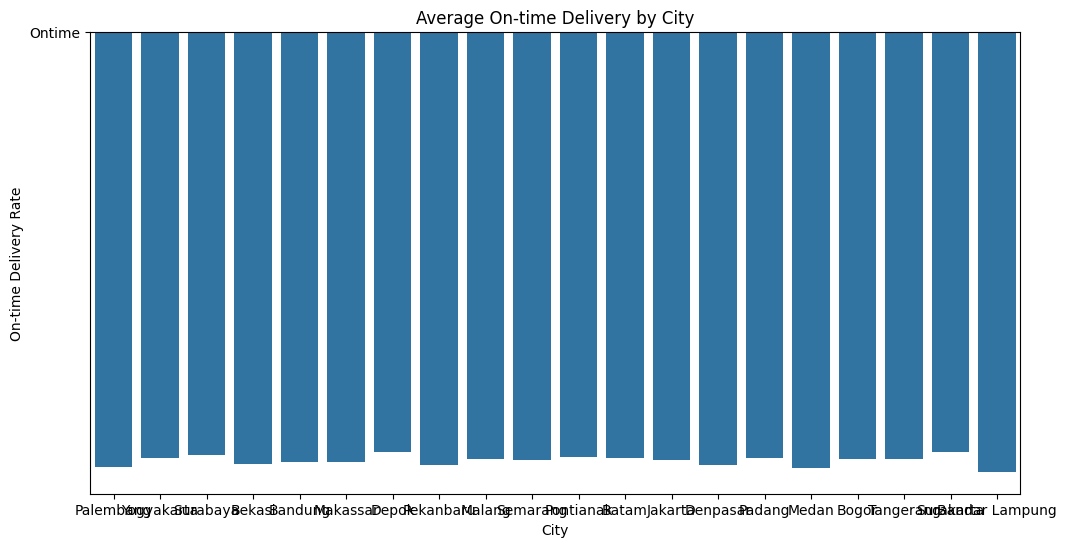

<ipython-input-4-2a73bcc2f49c>:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='type_of_delivery', y='ontime', ci=None)


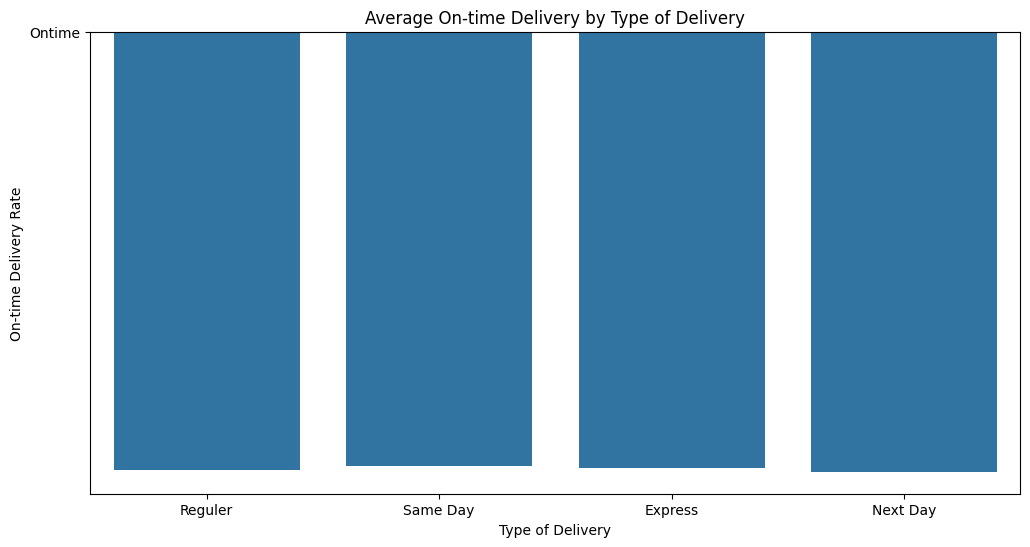

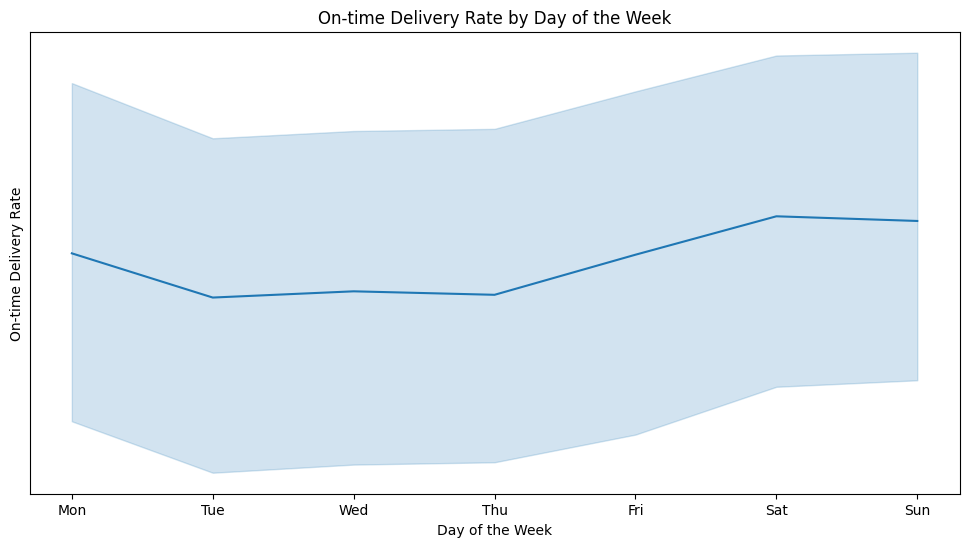

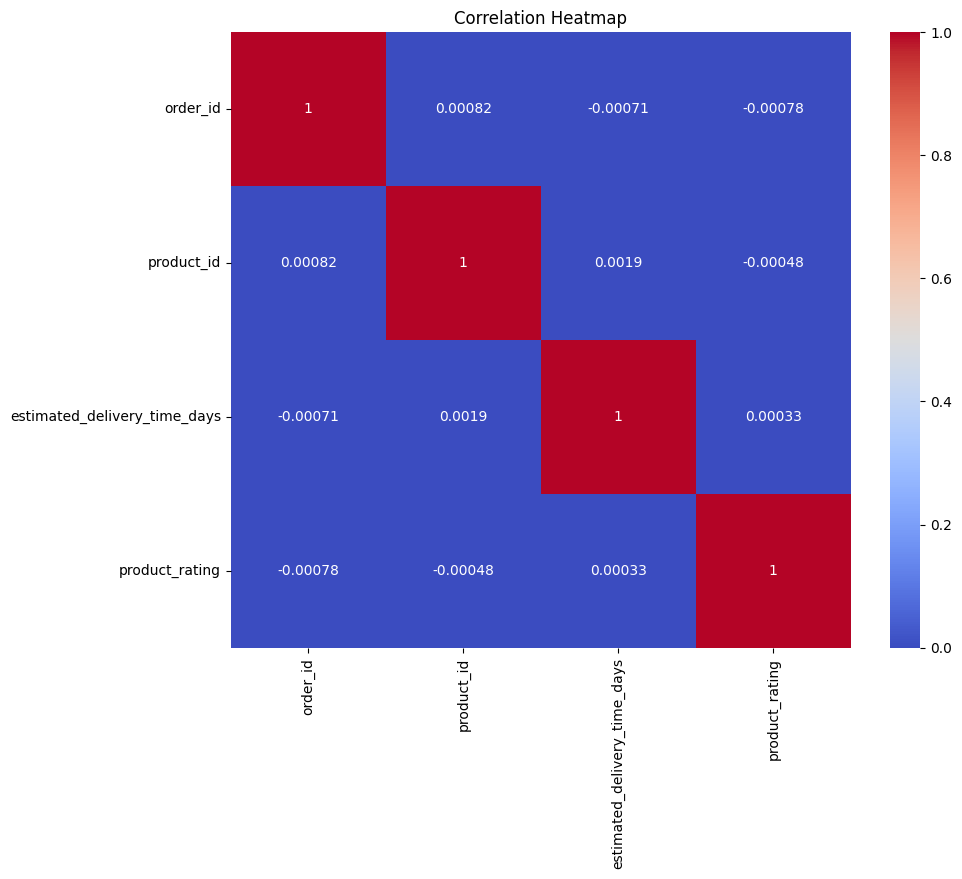

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the file path where your file is stored in Google Colab
data = pd.read_csv('/content/dataset_ecommerce.csv')  # Update '/content/data.csv' with your actual file path if different

# Display the first few rows
print("Dataset Preview:")
print(data.head())

# Data Preprocessing for Visualizations
# Convert categorical variables to numeric where necessary
data['order_date'] = pd.to_datetime(data['order_date'])  # Ensure order_date is in datetime format

# Extract features for time-based analysis
data['order_day_of_week'] = data['order_date'].dt.dayofweek  # Day of the week (0=Mon, 6=Sun)
data['order_month'] = data['order_date'].dt.month  # Month of the year

# Visualization 1: Average On-time Delivery by City
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='city', y='ontime', ci=None)
plt.title('Average On-time Delivery by City')
plt.xlabel('City')
plt.ylabel('On-time Delivery Rate')
plt.show()

# Visualization 2: Average On-time Delivery by Type of Delivery
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='type_of_delivery', y='ontime', ci=None)
plt.title('Average On-time Delivery by Type of Delivery')
plt.xlabel('Type of Delivery')
plt.ylabel('On-time Delivery Rate')
plt.show()

# Visualization 3: On-time Delivery Rate by Day of the Week
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='order_day_of_week', y='ontime')
plt.title('On-time Delivery Rate by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('On-time Delivery Rate')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

# Visualization 4: Correlation Heatmap
# Select only numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
